In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset using fetch_openml with explicit parser setting
mnist = fetch_openml('mnist_784', version=1, parser='auto')

# Ensure data is in the range [0, 1]
mnist.data = mnist.data / 255.0



In [4]:
print("MNIST dataset details:")
print(f"Number of samples: {mnist.data.shape[0]}")
print(f"Number of features: {mnist.data.shape[1]}")



MNIST dataset details:
Number of samples: 70000
Number of features: 784


In [5]:
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)



In [6]:
x_train = np.asarray(x_train)
print('x_train:'+ str(x_train.shape))
y_train = np.asarray(y_train)
print('y_train:'+ str(y_train.shape))
x_test = np.asarray(x_test)
print('x_test:'+ str( x_test.shape))
y_test = np.asarray(y_test)
print('y_test: '+ str(y_test.shape))



x_train:(56000, 784)
y_train:(56000,)
x_test:(14000, 784)
y_test: (14000,)


In [7]:
# normalize and scale the data

x_train_flat=x_train/255.0
x_test_flat=x_test/255.0

x_train_flat=x_train.reshape(x_train.shape[0],-1)
x_test_flat=x_test.reshape(x_test.shape[0],-1)

x_train_flat=x_train_flat[0:100][:]
y_train=y_train[0:100]

In [8]:
# train model
from sklearn.svm import SVC
model_linear=SVC(kernel='linear')
model_linear.fit(x_train_flat,y_train)

SVC(kernel='linear')

In [9]:
# get the accuracy
from sklearn import metrics
#predict
y_pred=model_linear.predict(x_test_flat)

#accuracy
print("accuracy",metrics.accuracy_score(y_test,y_pred),)

accuracy 0.7714285714285715


In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1077    1   48   35   22   34   69    6   36   15]
 [   0 1489    3   25    1   11    1    4   65    1]
 [   9  121  974   73   67    2   57   30   31   16]
 [  10   32   69 1030    4  189    5   32   48   14]
 [   2   21   13   26 1028    0    8    6    6  185]
 [   8  144    5  131   90  736   23   16   58   62]
 [  12   21   90   10   61   34 1164    0    3    1]
 [   8   42   10    4   38    2    0 1310    3   86]
 [   3   86   39  150   25   49   15   18  948   24]
 [   7   17   14   35  175   18    1   91   18 1044]]


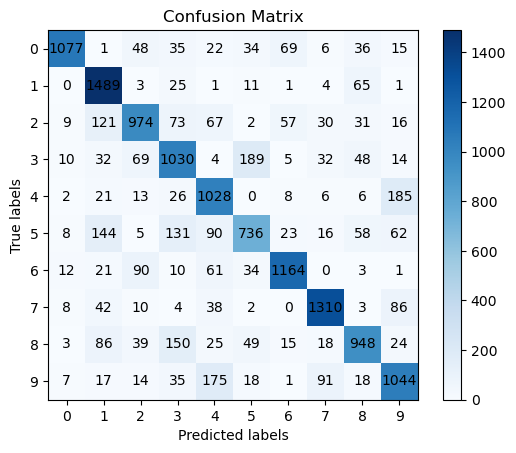

In [11]:
#Plotting confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = np.arange(len(cm))
plt.xticks(classes, classes)
plt.yticks(classes, classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Add annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()


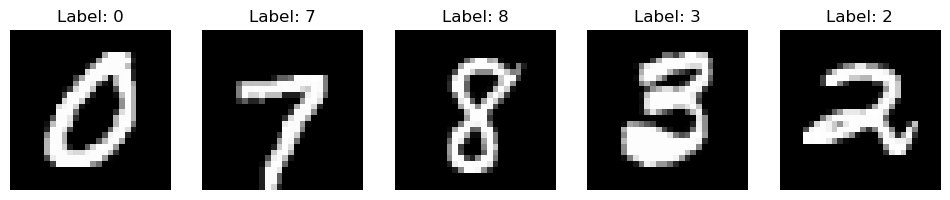

In [12]:
# Choose a random sample of images to plot
num_samples = 5
sample_indices = np.random.choice(mnist.data.shape[0], num_samples, replace=False)

# Plot the sampled images
plt.figure(figsize=(12, 4))
for i, index in enumerate(sample_indices, 1):
    plt.subplot(1, num_samples, i)
    plt.imshow(mnist.data.iloc[index].values.reshape(28, 28), cmap='gray') 
    plt.title(f"Label: {mnist.target.iloc[index]}")
    plt.axis('off')

plt.show()


In [13]:
from sklearn.decomposition import PCA


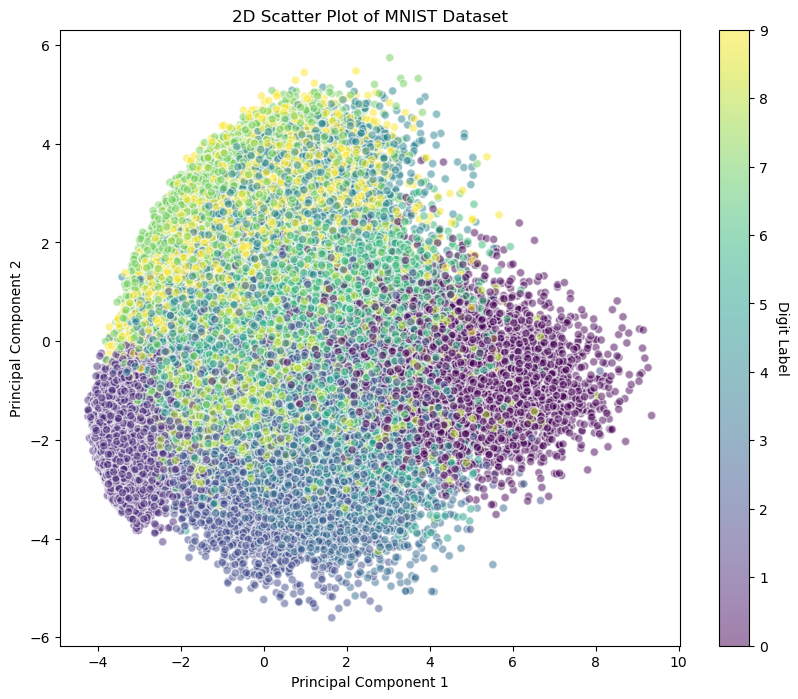

In [14]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist.data)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(mnist_2d[:, 0], mnist_2d[:, 1], c=mnist.target.astype(int), cmap='viridis', alpha=0.5, edgecolors='w')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Digit Label', rotation=270, labelpad=15)

plt.title('2D Scatter Plot of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [15]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Ensure that X_train and X_test are NumPy arrays
X_train_np = X_train.values.reshape(X_train.shape[0], -1)
X_test_np = X_test.values.reshape(X_test.shape[0], -1)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# Create an SVM classifier
classifier = svm.SVC(gamma=0.001)

# Fit the classifier on the training data
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)

# Print classification report
print("Classification report for SVM classifier:\n%s\n" % (metrics.classification_report(y_test, y_pred)))


Classification report for SVM classifier:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.97      0.99      0.98      1600
           2       0.96      0.95      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.95      0.96      0.96      1295
           5       0.96      0.95      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.93      0.97      0.95      1503
           8       0.96      0.94      0.95      1357
           9       0.96      0.93      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000


